# Algorithm comparison: Default of Credit Card Clients 
## Created by Ramses Alexander Coraspe Valdez
## Created on December 4, 2019

In [0]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import linear_model
import statsmodels.api as sm
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,roc_curve,auc
from sklearn.preprocessing import StandardScaler, PowerTransformer 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
missing = ["?"]
df1 = pd.read_csv('https://raw.githubusercontent.com/Wittline/Machine_Learning/master/Default%20of%20credit%20card%20clients/default%20of%20credit%20card%20clients.csv',                          
                  sep=',', 
                  names=['ID','LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default_payment_next_month'], na_values = missing);
df1.head(200)                 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,50000,2,1,2,24,1,2,2,2,2,2,36166,37188,37680,38462,39228,40035,1900,1400,1700,1532,1600,0,1
196,197,150000,2,2,1,34,-2,-2,-2,-2,-2,-2,0,0,0,116,0,1500,0,0,116,0,1500,0,0
197,198,20000,2,1,2,22,0,0,0,0,-1,0,18553,19446,19065,8332,18868,19247,1500,1032,541,20000,693,1000,0
198,199,500000,2,1,1,34,-2,-2,-2,-1,-1,-1,412,138,2299,1251,1206,1151,138,2299,1251,1206,1151,15816,0


In [3]:
df1.drop(['ID'], axis = 1, inplace = True)
Default = df1[df1['default_payment_next_month']==1]
NoDefault = df1[df1['default_payment_next_month']==0]
print(len(Default))
print(len(NoDefault))

6636
23364


In [4]:
df1.loc[df1['MARRIAGE'] == 0, 'MARRIAGE'] = 3
df1['MARRIAGE'].value_counts().head(10)
#(1 = married; 2 = single; 3 = others)
 

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [5]:
df1['SEX'].value_counts().head(10)

2    18112
1    11888
Name: SEX, dtype: int64

In [6]:
df1.loc[df1['EDUCATION'] == 0, 'EDUCATION'] = 4
df1.loc[df1['EDUCATION'] == 5, 'EDUCATION'] = 4
df1.loc[df1['EDUCATION'] == 6, 'EDUCATION'] = 4
df1['EDUCATION'].value_counts().head(10)
#(1 = graduate school; 2 = university; 3 = high school; 4 = others)

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

[]

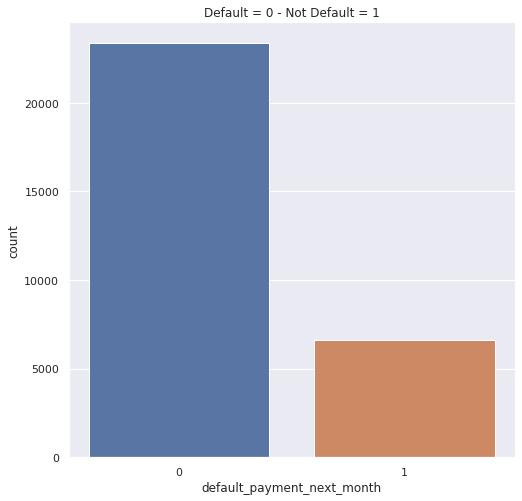

In [7]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 8))
plt.title('Default = 0 - Not Default = 1')
ax = sns.countplot(x="default_payment_next_month", data=df1)
plt.plot()

['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


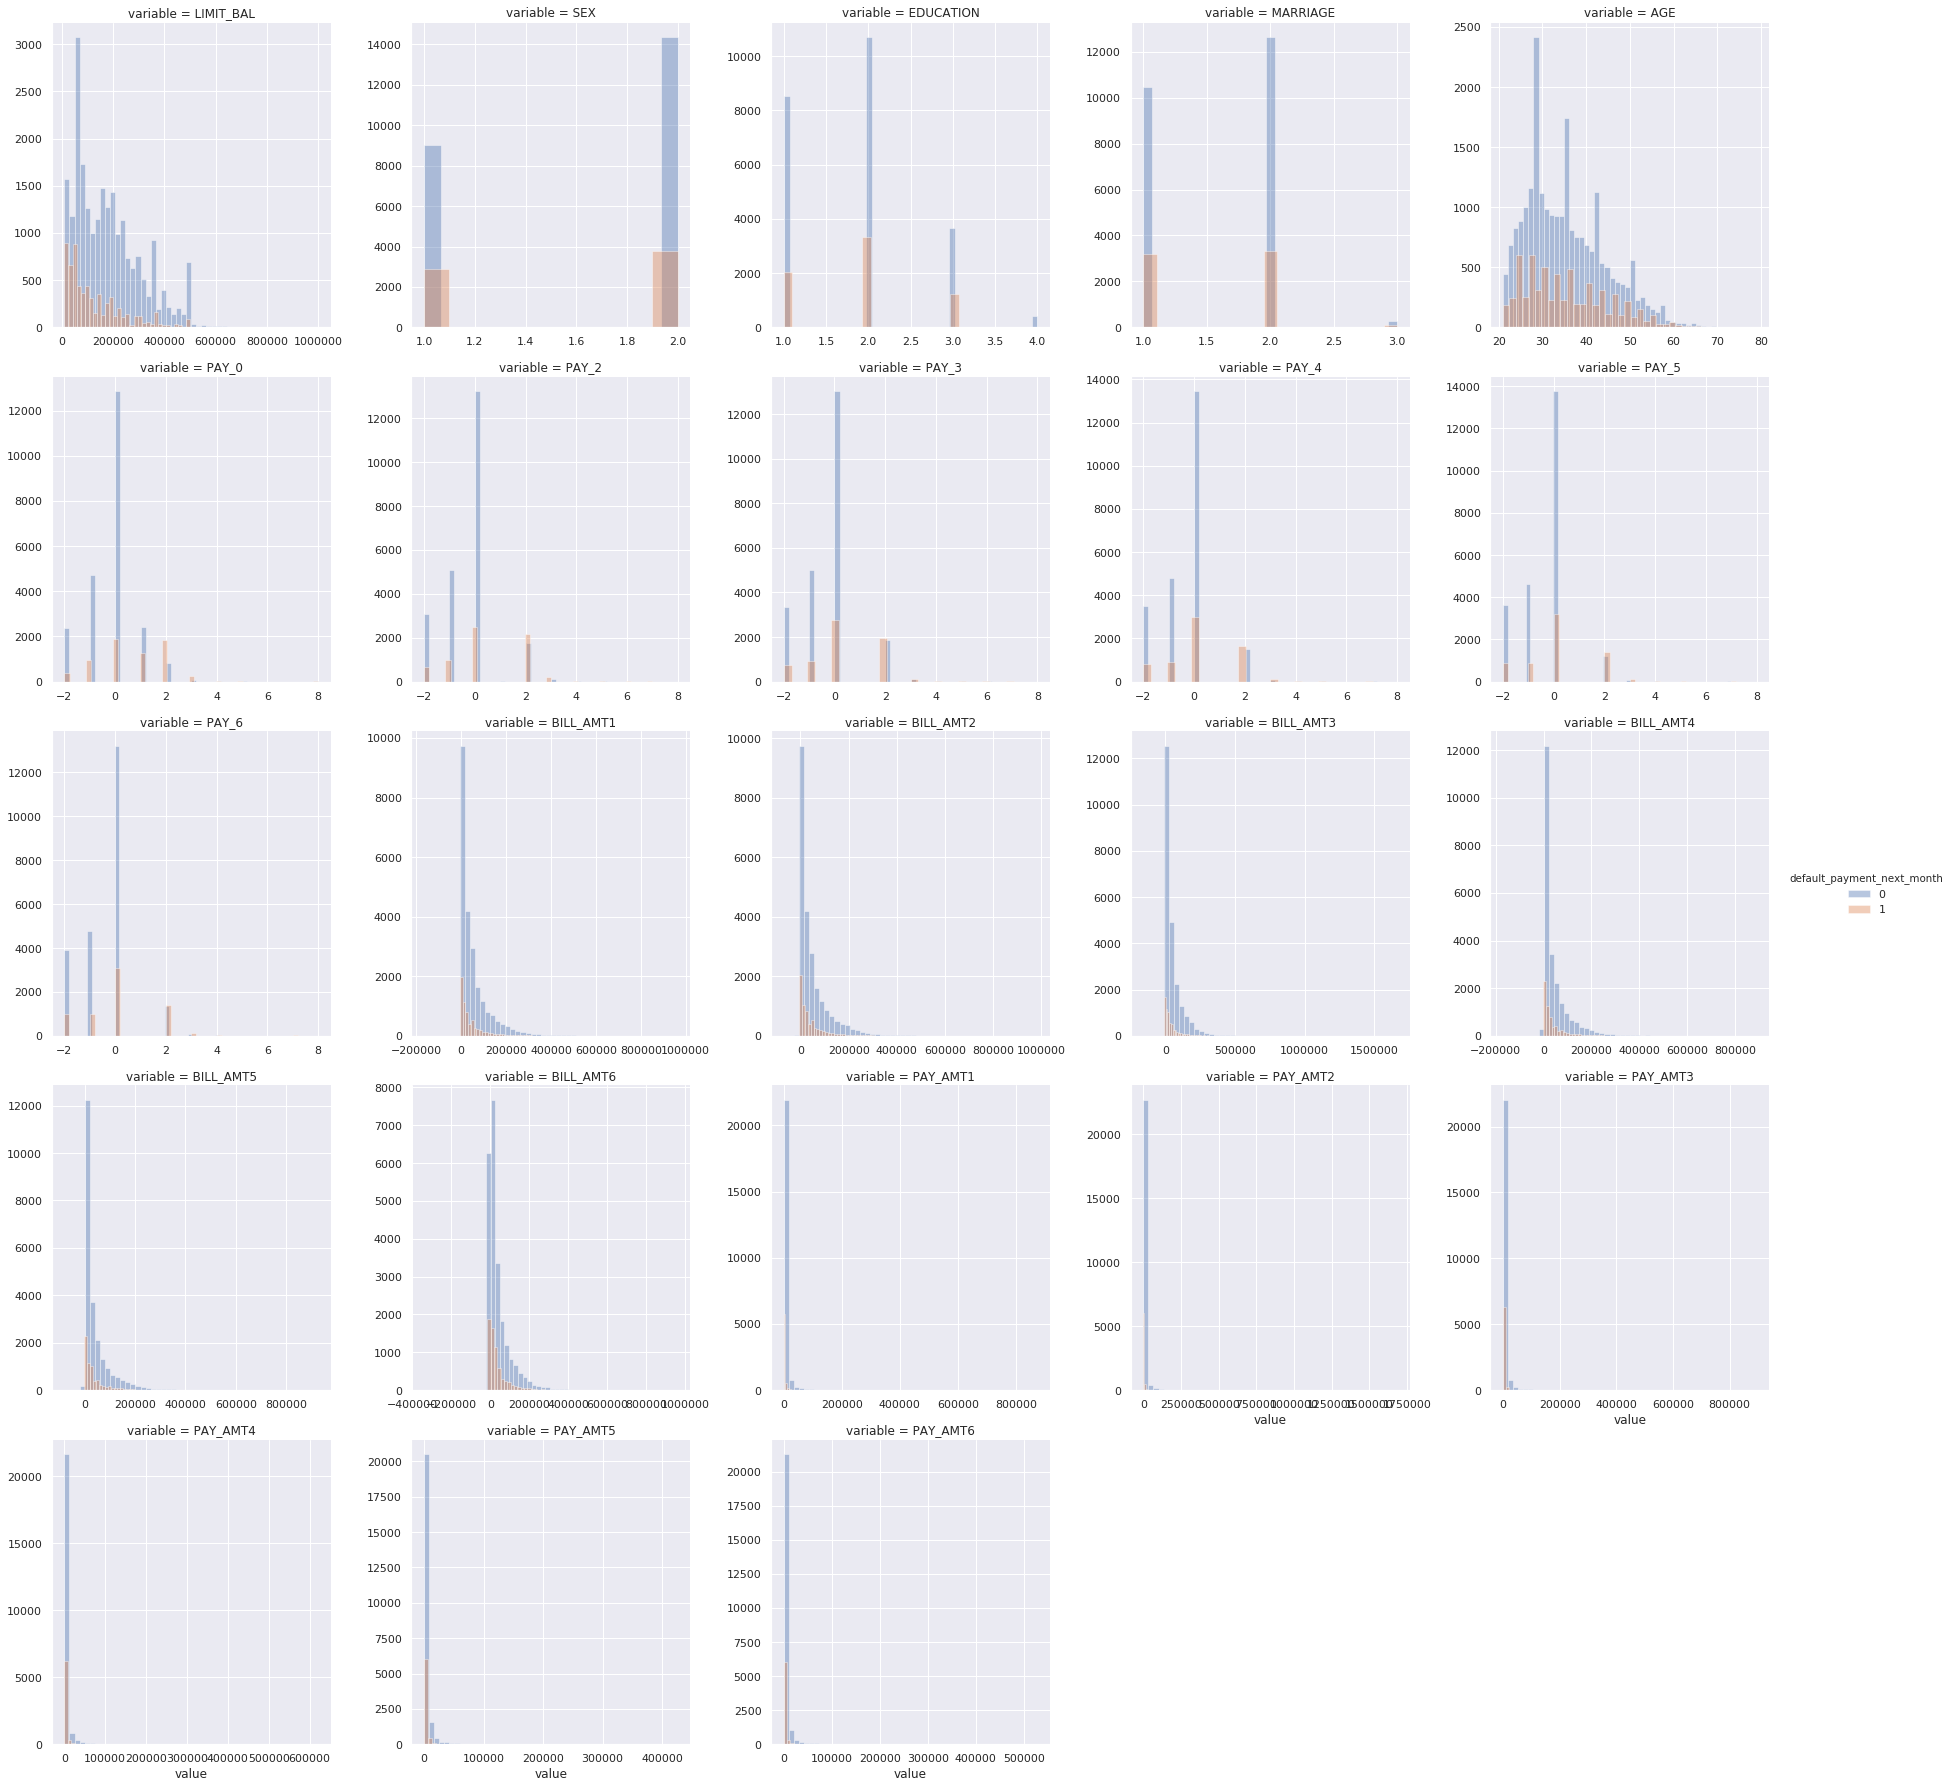

In [8]:
output = 'default_payment_next_month'

cols = [ f for f in df1.columns if df1.dtypes[ f ] != "object"]
cols.remove(output)
print(cols)

f = pd.melt( df1, id_vars=output, value_vars=cols)
g = sns.FacetGrid( f, hue=output, col="variable", col_wrap=5, height=5, sharex=False, sharey=False )
g = g.map( sns.distplot, "value" , kde=False).add_legend()
plt.plot();

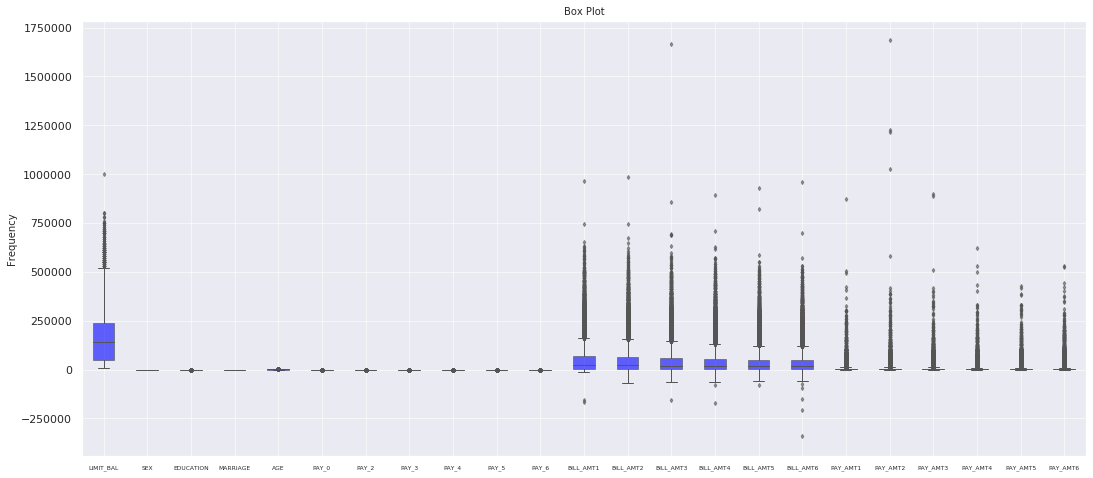

In [9]:
plt.figure(1, figsize=(18, 8));
bp = plt.boxplot([df1.LIMIT_BAL,df1.SEX,df1.EDUCATION,df1.MARRIAGE,df1.AGE,df1.PAY_0,df1.PAY_2,df1.PAY_3,df1.PAY_4,df1.PAY_5,df1.PAY_6,df1.BILL_AMT1,df1.BILL_AMT2,df1.BILL_AMT3,df1.BILL_AMT4,df1.BILL_AMT5,df1.BILL_AMT6,df1.PAY_AMT1,df1.PAY_AMT2,df1.PAY_AMT3,df1.PAY_AMT4,df1.PAY_AMT5,df1.PAY_AMT6], vert=True, patch_artist=True,
              flierprops={'alpha':0.6, 'markersize': 3,
                   'markeredgecolor': '#555555','marker': 'd',
                   'markerfacecolor': "#555555"}, 
              capprops={'color': '#555555', 'linewidth': 1},
              boxprops={'color': '#555555', 'linewidth': 1},
              whiskerprops={'color': '#555555', 'linewidth': 1},
              medianprops={'color': '#555555', 'linewidth': 1},
              meanprops={'color': '#555555', 'linewidth': 1});
plt.grid(True, alpha=0.6);
plt.title("Box Plot", fontsize=10);
plt.ylabel("Frequency", fontsize=10);
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9, 10, 11,12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,23], labels=['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'], fontsize=6);
bp['boxes'][0].set(facecolor='blue', alpha= 0.6);
bp['boxes'][1].set(facecolor="blue",alpha= 0.6 );
bp['boxes'][2].set(facecolor='blue', alpha= 0.6);
bp['boxes'][3].set(facecolor="blue",alpha= 0.6 );
bp['boxes'][4].set(facecolor="blue",alpha= 0.6 );
bp['boxes'][5].set(facecolor="blue",alpha= 0.6 );
bp['boxes'][6].set(facecolor="blue",alpha= 0.6 );
bp['boxes'][7].set(facecolor="blue",alpha= 0.6 );
bp['boxes'][8].set(facecolor="blue",alpha= 0.6 );
bp['boxes'][9].set(facecolor="blue",alpha= 0.6 );
bp['boxes'][10].set(facecolor='blue', alpha= 0.6);
bp['boxes'][11].set(facecolor="blue",alpha= 0.6 );
bp['boxes'][12].set(facecolor="blue",alpha= 0.6 );
bp['boxes'][13].set(facecolor="blue",alpha= 0.6 );
bp['boxes'][14].set(facecolor="blue",alpha= 0.6 );
bp['boxes'][15].set(facecolor="blue",alpha= 0.6 );
bp['boxes'][16].set(facecolor="blue",alpha= 0.6 );
bp['boxes'][17].set(facecolor="blue",alpha= 0.6 );
bp['boxes'][18].set(facecolor="blue",alpha= 0.6 );
bp['boxes'][19].set(facecolor="blue",alpha= 0.6 );
bp['boxes'][20].set(facecolor="blue",alpha= 0.6 );
bp['boxes'][21].set(facecolor="blue",alpha= 0.6 );
bp['boxes'][22].set(facecolor="blue",alpha= 0.6 );
plt.show();

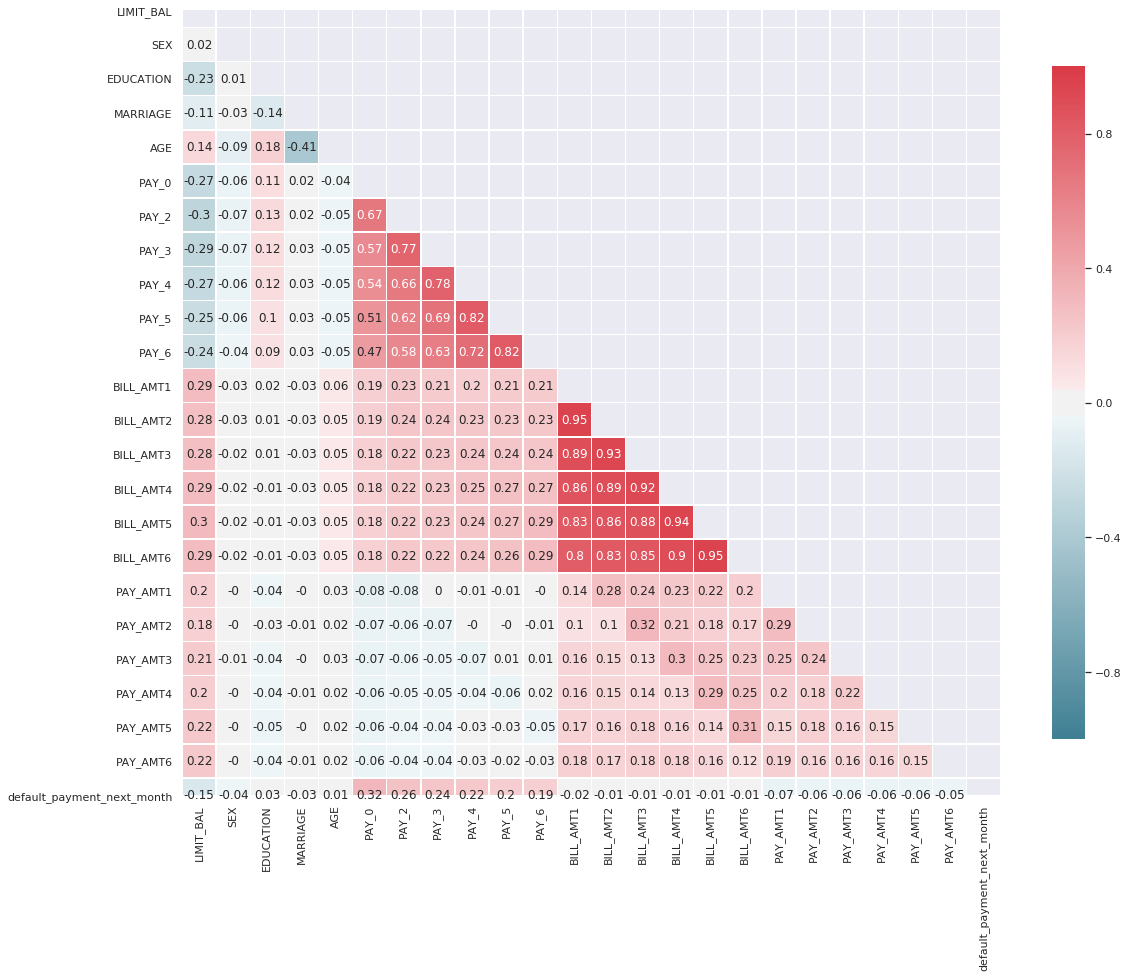

In [10]:
corr = df1.corr(method='pearson').round(2)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(17, 17))

c_map = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=c_map, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .6}, annot=True)

plt.tight_layout()

#pp.ProfileReport(df1)

In [0]:
df1.drop(['BILL_AMT2'], axis = 1, inplace = True)
df1.drop(['BILL_AMT3'], axis = 1, inplace = True)
df1.drop(['BILL_AMT4'], axis = 1, inplace = True)
df1.drop(['BILL_AMT5'], axis = 1, inplace = True)
df1.drop(['BILL_AMT6'], axis = 1, inplace = True)

In [0]:
# categorical_vars = ['SEX','EDUCATION','MARRIAGE', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
# df1[categorical_vars] = df1[categorical_vars].astype(str)
# df1 = pd.get_dummies(df1,columns=categorical_vars,drop_first=True)
# df1.head()

# col_to_norm = ['LIMIT_BAL','AGE','BILL_AMT1','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
# df1[col_to_norm] = df1[col_to_norm].apply(lambda x : (x-np.mean(x))/np.std(x))

In [0]:
y = df1.default_payment_next_month
x = df1.drop(['default_payment_next_month'], axis = 1) 

test_sizes = [0.1, 0.2, 0.3]
scaler = StandardScaler()

In [14]:
lg = linear_model.LogisticRegression(random_state = 40, max_iter = 500,solver='lbfgs') 

for i in range(0, 3):   
   print("sklearn - LogisticRegression: " + str(test_sizes[i]))
   x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_sizes[i], random_state=40)
   scaler.fit(x_train)
   x_train = scaler.transform(x_train)
   x_test = scaler.transform(x_test)   
   lg.fit(x_train, y_train)
   y_pred = lg.predict(x_train)     
   print("Train accuracy_score:", accuracy_score(y_train, y_pred))
   print("Train f1_score:", f1_score(y_train, y_pred))
   print("Train roc_auc_score:", roc_auc_score(y_train, y_pred))      
   y_pred = lg.predict(x_test)        
   print("Test accuracy_score:", accuracy_score(y_test, y_pred))   
   print("Test f1_score:", f1_score(y_test, y_pred))
   print("Test roc_auc_score:", roc_auc_score(y_test, y_pred))     
   print("")
    

sklearn - LogisticRegression: 0.1
Train accuracy_score: 0.8120740740740741
Train f1_score: 0.3591816115180601
Train roc_auc_score: 0.6065328021358247
Test accuracy_score: 0.7976666666666666
Test f1_score: 0.3380588876772083
Test roc_auc_score: 0.5964647153289095

sklearn - LogisticRegression: 0.2
Train accuracy_score: 0.81025
Train f1_score: 0.35128205128205126
Train roc_auc_score: 0.6033791493134668
Test accuracy_score: 0.8108333333333333
Test f1_score: 0.36200112422709385
Test roc_auc_score: 0.6072998491611932

sklearn - LogisticRegression: 0.3
Train accuracy_score: 0.8101904761904762
Train f1_score: 0.3501793283338767
Train roc_auc_score: 0.6029707183222663
Test accuracy_score: 0.8111111111111111
Test f1_score: 0.359457422758101
Test roc_auc_score: 0.6064316376714276



Matriz de confusion

In [15]:
lg = linear_model.LogisticRegression(random_state = 40, max_iter = 500,solver='lbfgs') 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=40)
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)   
print("Test accuracy: {} ".format(lg.fit(x_train, y_train).score(x_test, y_test))) 

score = lg.score(x_test, y_test)
predictions = lg.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
cm


Test accuracy: 0.7976666666666666 


array([[2238,   78],
       [ 529,  155]])

In [16]:
classifier = MLPClassifier(hidden_layer_sizes=(120, 80, 40,  10), max_iter=2000, activation = 'relu', alpha= 0.5,  solver='sgd', random_state=40)


for i in range(0, 3):
  print("Partition: " , test_sizes[i])           
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_sizes[i], random_state=40)
  scaler.fit(x_train)
  x_train = scaler.transform(x_train)
  x_test = scaler.transform(x_test)          
  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x_train)
  print("Train accuracy_score:", accuracy_score(y_train, y_pred))
  print("Train f1_score:", f1_score(y_train, y_pred))
  print("Train roc_auc_score:", roc_auc_score(y_train, y_pred))      
  y_pred = classifier.predict(x_test)        
  print("Test accuracy_score:", accuracy_score(y_test, y_pred))   
  print("Test f1_score:", f1_score(y_test, y_pred))
  print("Test roc_auc_score:", roc_auc_score(y_test, y_pred)) 
  cm = metrics.confusion_matrix(y_test, y_pred)    
  print(cm)
  print("")


Partition:  0.1
Train accuracy_score: 0.8284074074074074
Train f1_score: 0.4882359438860046
Train roc_auc_score: 0.6644859752210002
Test accuracy_score: 0.8153333333333334
Test f1_score: 0.473384030418251
Test roc_auc_score: 0.6563266975729479
[[2197  119]
 [ 435  249]]

Partition:  0.2
Train accuracy_score: 0.8281666666666667
Train f1_score: 0.4939877300613497
Train roc_auc_score: 0.6673333954683636
Test accuracy_score: 0.8238333333333333
Test f1_score: 0.48514369215781783
Test roc_auc_score: 0.6636549979400118
[[4445  238]
 [ 819  498]]

Partition:  0.3
Train accuracy_score: 0.8317619047619048
Train f1_score: 0.515297022911236
Train roc_auc_score: 0.6785922438399455
Test accuracy_score: 0.8232222222222222
Test f1_score: 0.4976318282286075
Test roc_auc_score: 0.6705378327333776
[[6621  398]
 [1193  788]]



In [17]:
svclassifier = SVC(kernel='rbf')
for i in range(0, 3):
    print("Partition: " , test_sizes[i])           
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_sizes[i], random_state=40)              
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)   
    svclassifier.fit(x_train, y_train)    
    y_pred = svclassifier.predict(x_train)
    print("Train accuracy_score:", accuracy_score(y_train, y_pred))
    print("Train f1_score:", f1_score(y_train, y_pred))
    print("Train roc_auc_score:", roc_auc_score(y_train, y_pred))      
    y_pred = svclassifier.predict(x_test)        
    print("Test accuracy_score:", accuracy_score(y_test, y_pred))   
    print("Test f1_score:", f1_score(y_test, y_pred))
    print("Test roc_auc_score:", roc_auc_score(y_test, y_pred))     
    print("")

Partition:  0.1
Train accuracy_score: 0.8255555555555556
Train f1_score: 0.4680370454032076
Train roc_auc_score: 0.6543423020806513
Test accuracy_score: 0.818
Test f1_score: 0.4657534246575343
Test roc_auc_score: 0.6523876617277218

Partition:  0.2
Train accuracy_score: 0.82375
Train f1_score: 0.46509863429438547
Train roc_auc_score: 0.6527969685351286
Test accuracy_score: 0.8253333333333334
Test f1_score: 0.4749498997995992
Test roc_auc_score: 0.658066763075088

Partition:  0.3
Train accuracy_score: 0.823
Train f1_score: 0.4604441863840906
Train roc_auc_score: 0.650531881861276
Test accuracy_score: 0.824
Test f1_score: 0.468099395567495
Test roc_auc_score: 0.654550686285347



In [0]:
# for k in range(1,50):
#   knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1)   
#   for i in range(0, 3):  
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_sizes[i], random_state=40)   
#     scaler.fit(x_train)
#     x_train = scaler.transform(x_train)
#     x_test = scaler.transform(x_test)   
#     knn.fit(x_train,y_train)
#     pred_i = knn.predict(x_test)
#     print(str(k) + ',' + str(test_sizes[i]) + ", " + str(np.mean(pred_i != y_test)))        

# # plt.figure(figsize=(10,6))
# # plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
# #          markerfacecolor='red', markersize=10)
# # plt.title('Error Rate vs. K Value')
# # plt.xlabel('K')
# # plt.ylabel('Error Rate')

In [19]:
knn = KNeighborsClassifier(n_neighbors=23)
for i in range(0, 3):  
    print("Partition: " , test_sizes[i])           
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_sizes[i], random_state=40)              
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)   
    knn.fit(x_train, y_train)    
    y_pred = knn.predict(x_train)
    print("Train accuracy_score:", accuracy_score(y_train, y_pred))
    print("Train f1_score:", f1_score(y_train, y_pred))
    print("Train roc_auc_score:", roc_auc_score(y_train, y_pred))      
    y_pred = knn.predict(x_test)        
    print("Test accuracy_score:", accuracy_score(y_test, y_pred))   
    print("Test f1_score:", f1_score(y_test, y_pred))
    print("Test roc_auc_score:", roc_auc_score(y_test, y_pred))     
    print("")


Partition:  0.1
Train accuracy_score: 0.8216296296296296
Train f1_score: 0.4689016321129246
Train roc_auc_score: 0.6550777562192714
Test accuracy_score: 0.814
Test f1_score: 0.47258979206049156
Test roc_auc_score: 0.655978244402024

Partition:  0.2
Train accuracy_score: 0.82075
Train f1_score: 0.46559006211180126
Train roc_auc_score: 0.6532231882740027
Test accuracy_score: 0.8216666666666667
Test f1_score: 0.47855750487329435
Test roc_auc_score: 0.6603568279002664

Partition:  0.3
Train accuracy_score: 0.8186190476190476
Train f1_score: 0.4531227566403446
Train roc_auc_score: 0.6471029976286694
Test accuracy_score: 0.8182222222222222
Test f1_score: 0.4639580602883355
Test roc_auc_score: 0.6528392430756382



In [20]:
naive_bayes = GaussianNB()
for i in range(0, 3):  
    print("Partition: " , test_sizes[i])           
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_sizes[i], random_state=40)              
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)   
    naive_bayes.fit(x_train,y_train)
    y_pred = naive_bayes.predict(x_train)
    print("Train accuracy_score:", accuracy_score(y_train, y_pred))
    print("Train f1_score:", f1_score(y_train, y_pred))
    print("Train roc_auc_score:", roc_auc_score(y_train, y_pred))      
    y_pred = naive_bayes.predict(x_test)        
    print("Test accuracy_score:", accuracy_score(y_test, y_pred))   
    print("Test f1_score:", f1_score(y_test, y_pred))
    print("Test roc_auc_score:", roc_auc_score(y_test, y_pred))     
    print("")

Partition:  0.1
Train accuracy_score: 0.7181851851851851
Train f1_score: 0.5014088198676364
Train roc_auc_score: 0.6911546649133777
Test accuracy_score: 0.7263333333333334
Test f1_score: 0.5196021064950264
Test roc_auc_score: 0.6991296245795837

Partition:  0.2
Train accuracy_score: 0.7212083333333333
Train f1_score: 0.5036718344336473
Train roc_auc_score: 0.691549406421761
Test accuracy_score: 0.7256666666666667
Test f1_score: 0.509827278141751
Test roc_auc_score: 0.6984595568617551

Partition:  0.3
Train accuracy_score: 0.7248095238095238
Train f1_score: 0.5033943456217238
Train roc_auc_score: 0.6906250790635199
Test accuracy_score: 0.73
Test f1_score: 0.5138055222088835
Test roc_auc_score: 0.7006281141135703

